In [24]:
from sage.all import *

def metricna_dimenzija_usmerjenega_grafa(graf):
    # Preverimo, ali je graf usmerjen
    if not isinstance(graf, DiGraph):
        return "Napaka: Podani graf ni usmerjen graf."

    # CLP za izračun metrične dimenzije
    V = graf.vertices()

    lp = MixedIntegerLinearProgram(maximization=False)
    x = lp.new_variable(binary=True)  # Spremenljivke x[v] so binarne (0 ali 1)

    # Cilj: minimizirati vsoto vseh x[v]
    lp.set_objective(sum(x[v] for v in V))

    # Preverjanje, ali graf izpolnjuje pogoje (za vsak par u, v mora obstajati w)
    for u in V:
        for v in V:
            if u != v:
                # Najdemo vozlišča w, ki zadovoljijo pogoje:
                # 1. d(w, u) != d(w, v)
                # 2. d(w, u) < \infty in d(w, v) < \infty
                eligible_w = [w for w in V 
                              if graf.distance(w, u) != graf.distance(w, v) and 
                                 graf.distance(w, u) < infinity and 
                                 graf.distance(w, v) < infinity]
                
                # Če za par u, v ne obstaja ustrezno w, graf ni veljaven
                if not eligible_w:
                    return "Metrične dimenzije ni mogoče določiti: za par vozlišč ({}, {}) ne obstaja ustrezno vozlišče.".format(u, v)

                # Dodamo omejitev, če obstajajo ustrezna vozlišča w
                lp.add_constraint(sum(x[w] for w in eligible_w) >= 1)

    lp.solve()

    # Pridobimo rezultate
    razresljiva_mnozica = [v for v in V if lp.get_values(x[v]) == 1]
    return razresljiva_mnozica, len(razresljiva_mnozica)

**NEKAJ PRIMEROV UPORABE CLP ZA IZRAČUN METRIČNE DIMENZIJE USMERJENIH GRAFOV:**  



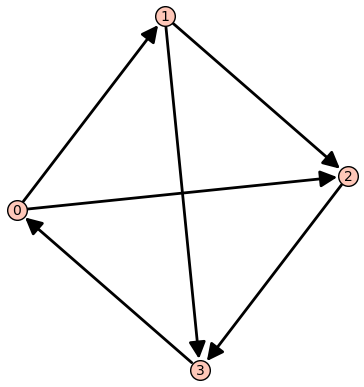

([2], 1)

In [25]:
G = DiGraph({0: [1, 2], 1: [2, 3], 2: [3], 3: [0]})
G.show()
metricna_dimenzija_usmerjenega_grafa(G)


In [26]:
H = Graph([(0, 1), (0, 'a'), (2, 'b')])
H.plot()
metricna_dimenzija_usmerjenega_grafa(H)

'Napaka: Podani graf ni usmerjen graf.'

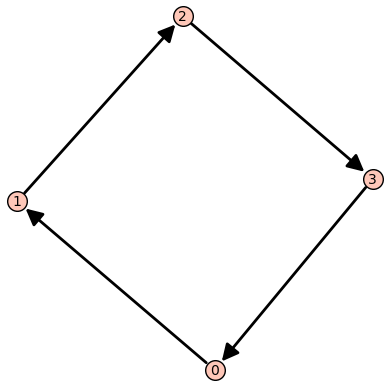

Test 1:
([0], 1)


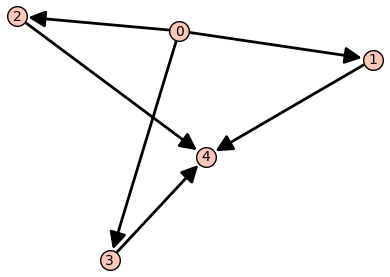

Test 2:
Metrične dimenzije ni mogoče določiti: za par vozlišč (1, 2) ne obstaja ustrezno vozlišče.


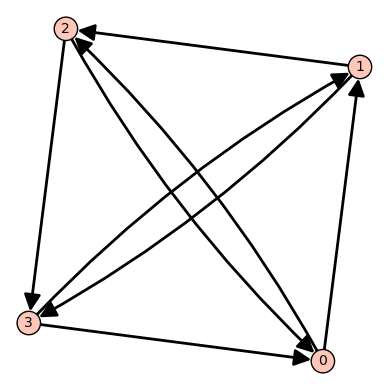

Test 3:
([0, 1], 2)


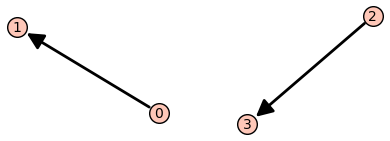

Test 4:
Metrične dimenzije ni mogoče določiti: za par vozlišč (0, 2) ne obstaja ustrezno vozlišče.


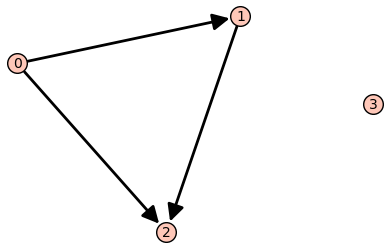

Test 5:
Metrične dimenzije ni mogoče določiti: za par vozlišč (0, 3) ne obstaja ustrezno vozlišče.


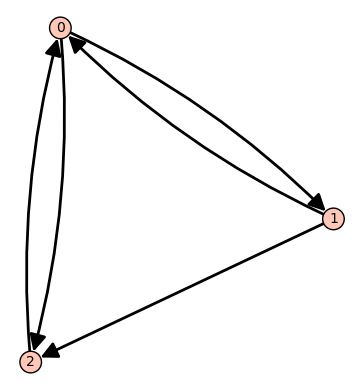

Test 6:
([2], 1)


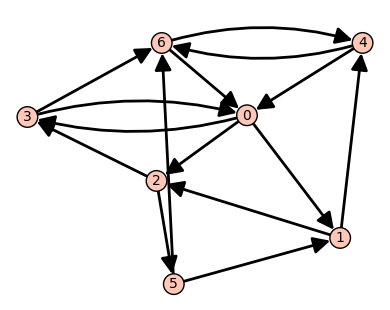

Test 7:
([0, 2], 2)


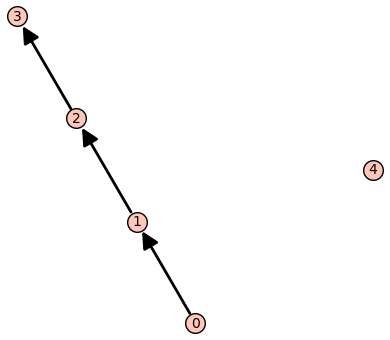

Test 8:
Metrične dimenzije ni mogoče določiti: za par vozlišč (0, 4) ne obstaja ustrezno vozlišče.


In [27]:
grafi = [
    DiGraph({0: [1], 1: [2], 2: [3], 3: [0]}),  # G1
    DiGraph({0: [1, 2, 3], 1: [4], 2: [4], 3: [4], 4: []}),  # G2
    DiGraph({0: [1, 2], 1: [2, 3], 2: [3, 0], 3: [0, 1]}),  # G3
    DiGraph({0: [1], 2: [3]}),  # G4
    DiGraph({0: [1, 2], 1: [2], 2: [], 3: []}),  # G5
    DiGraph({0: [1, 2], 1: [2, 0], 2: [0]}),  # G6
    DiGraph({
        0: [1, 2, 3],
        1: [2, 4],
        2: [3, 5],
        3: [0, 6],
        4: [0, 6],
        5: [1, 6],
        6: [0, 4]
    }),  # G7
    DiGraph({0: [1], 1: [2], 2: [3], 3: [], 4: []})  # G8
]

for i, G in enumerate(grafi, start=1):
    G.show()
    print(f"Test {i}:")
    rezultat = metricna_dimenzija_usmerjenega_grafa(G)
    print(rezultat)


Graf T:


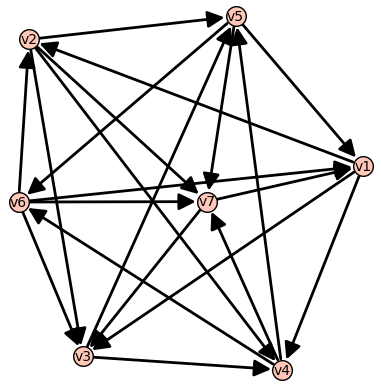

(['v1', 'v3', 'v7'], 3)

In [28]:
T = DiGraph()

vozlisca = ["v1", "v2", "v3", "v4", "v5", "v6", "v7"]
T.add_vertices(vozlisca)

povezave = [

    ("v1", "v2"), ("v1", "v3"), ("v1", "v4"),
    ("v2", "v3"), ("v2", "v4"), ("v2", "v5"), ("v2", "v7"),
    ("v3", "v4"), ("v3", "v5"),
    ("v4", "v7"), ("v4", "v5"), ("v4", "v6"),
    ("v5", "v6"), ("v5", "v7"), ("v5", "v1"),
    ("v6", "v7"), ("v6", "v1"), ("v6", "v2"), ("v6", "v3"),
    ("v7", "v1"), ("v7", "v3")
]

T.add_edges(povezave)

print("Graf T:")
T.show()
metricna_dimenzija_usmerjenega_grafa(T)


**UPORABA  CLP NA CIRKULANTNIH GRAFH:**  



In [29]:
def clockwise_circulant_graph(n, d):
    G = DiGraph()

    # Dodajanje vozlišč
    G.add_vertices(range(n))

    # Dodajanje usmerjenih povezav v smeri urinega kazalca
    for i in range(n):
        for j in range(1, d + 1):
            target = (i + j) % n
            # test, če gre za isto vozlišče
            if i != target:
                G.add_edge(i, target)

    plot = G.plot(layout="circular", vertex_size=300, vertex_color="skyblue", edge_color="black", 
                  vertex_labels=True)
    plot.show()

    return G



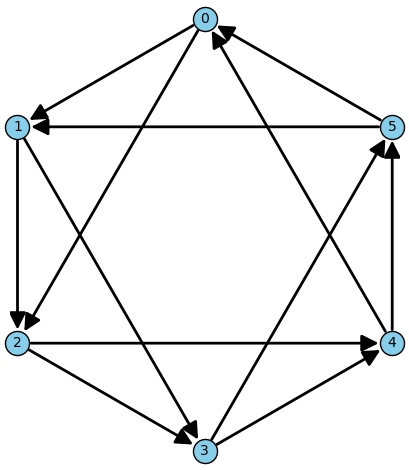

([0, 5], 2)

In [30]:
C6_2 = clockwise_circulant_graph(6, 2)  
metricna_dimenzija_usmerjenega_grafa(C6_2)

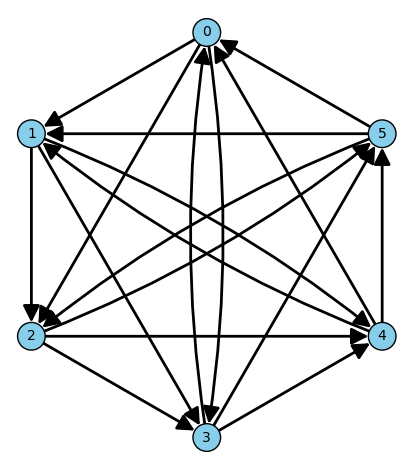

([0, 1, 3], 3)

In [31]:
C6_3 = clockwise_circulant_graph(6, 3) 
metricna_dimenzija_usmerjenega_grafa(C6_3)

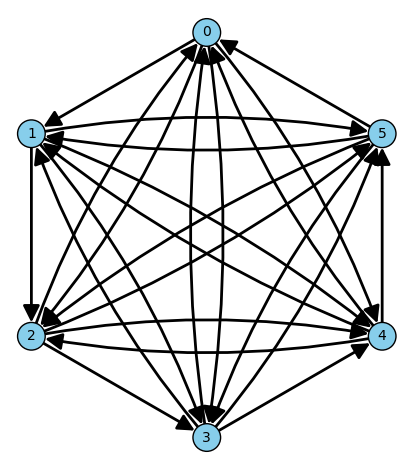

([0, 1, 3], 3)

In [32]:
C6_4 = clockwise_circulant_graph(6, 4)  
metricna_dimenzija_usmerjenega_grafa(C6_4)

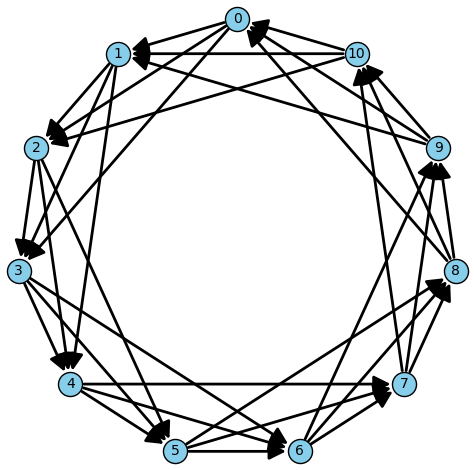

([0, 2, 9], 3)

In [33]:
C11_3 = clockwise_circulant_graph(11, 3)  
metricna_dimenzija_usmerjenega_grafa(C11_3)

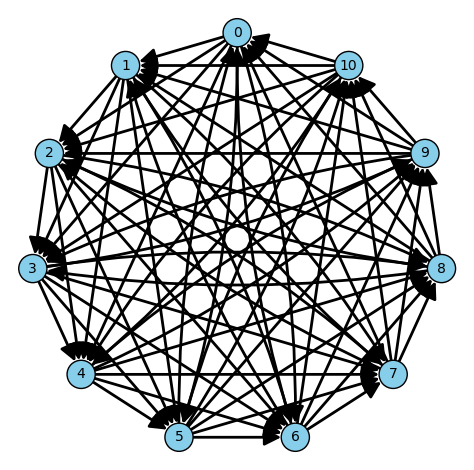

([0, 1, 2, 3, 5], 5)

In [34]:
C11_6 = clockwise_circulant_graph(11, 6)  
metricna_dimenzija_usmerjenega_grafa(C11_6)

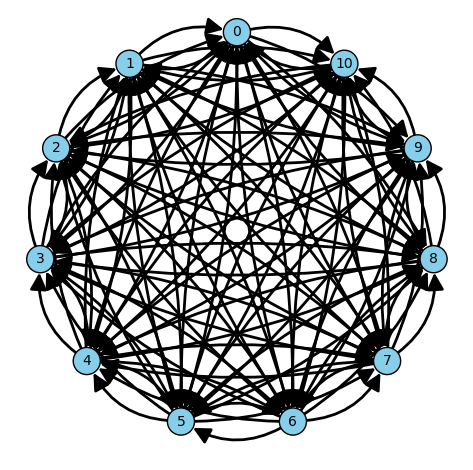

([0, 1, 3, 4, 5, 6, 7, 8, 9, 10], 10)

In [35]:
C11_10 = clockwise_circulant_graph(11, 10)  
metricna_dimenzija_usmerjenega_grafa(C11_10)

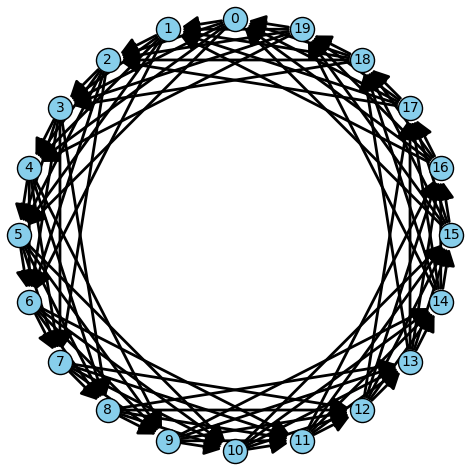

([0, 3, 9, 12, 16], 5)

In [36]:
C20_5 = clockwise_circulant_graph(20, 5)  
metricna_dimenzija_usmerjenega_grafa(C20_5)

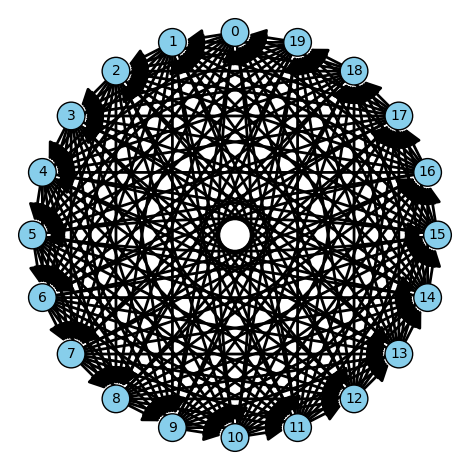

([0, 1, 2, 10, 13, 14, 15, 16, 17, 18], 10)

In [37]:
C20_10 = clockwise_circulant_graph(20, 10)  
metricna_dimenzija_usmerjenega_grafa(C20_10)

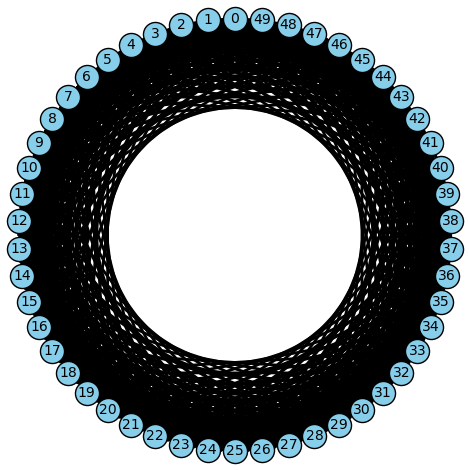

([2, 4, 5, 10, 13, 15, 16, 24, 27, 38, 41, 49], 12)

In [38]:
C50_15 = clockwise_circulant_graph(50, 15)  
metricna_dimenzija_usmerjenega_grafa(C50_15)

In [49]:
#ponovno sem definirala to funkcijo da ko poženem file, se od tukaj naprej posamični grafi ne bodo več risali
def clockwise_circulant_graph(n, d):
    G = DiGraph()

    G.add_vertices(range(n))

    for i in range(n):
        for j in range(1, d + 1):
            target = (i + j) % n
            if i != target:
                G.add_edge(i, target)

    plot = G.plot(layout="circular", vertex_size=300, vertex_color="skyblue", edge_color="black", 
                  vertex_labels=True)

    return G

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def generiraj_podatke_za_circulant_graphs(max_n, max_d):
    podatki = []  # Seznam za shranjevanje rezultatov 
    for n in range(3, max_n + 1):  
        for d in range(1, min(n, max_d) + 1):  
            if d >= n:  # Preverim, da d ni enako ali večje od n
                continue
            G = clockwise_circulant_graph(n, d)  # Generiraj graf
            try:
                _, dimenzija = metricna_dimenzija_usmerjenega_grafa(G)  
                podatki.append((n, d, dimenzija))
            except Exception as e:
                podatki.append((n, d, None))  # Če ne gre, zabeleži None
    return podatki

    

In [51]:
def graf_metricnih_dimenzij(n):
    podatki = generiraj_podatke_za_circulant_graphs(n, n - 1)
    
    df = pd.DataFrame(podatki, columns=['n', 'd', 'dimenzija'])

    pivot = df.pivot(index='d', columns='n', values='dimenzija')

    # Če so prisotne NaN vrednosti, jih zamenjam z 0
    pivot = pivot.fillna(0)

 
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis", cbar_kws={'label': 'Metrična dimenzija'})
    plt.xlabel("n (število vozlišč)")
    plt.ylabel("d")
    plt.show()


/tmp/ipykernel_451/838295509.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = pivot.fillna(Integer(0))


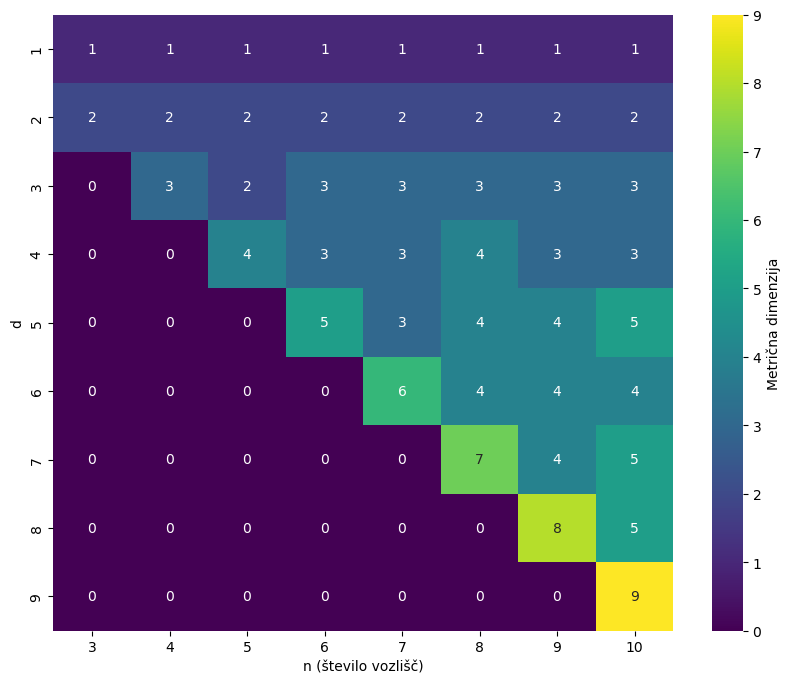

In [52]:
graf_metricnih_dimenzij(10)

/tmp/ipykernel_451/838295509.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = pivot.fillna(Integer(0))


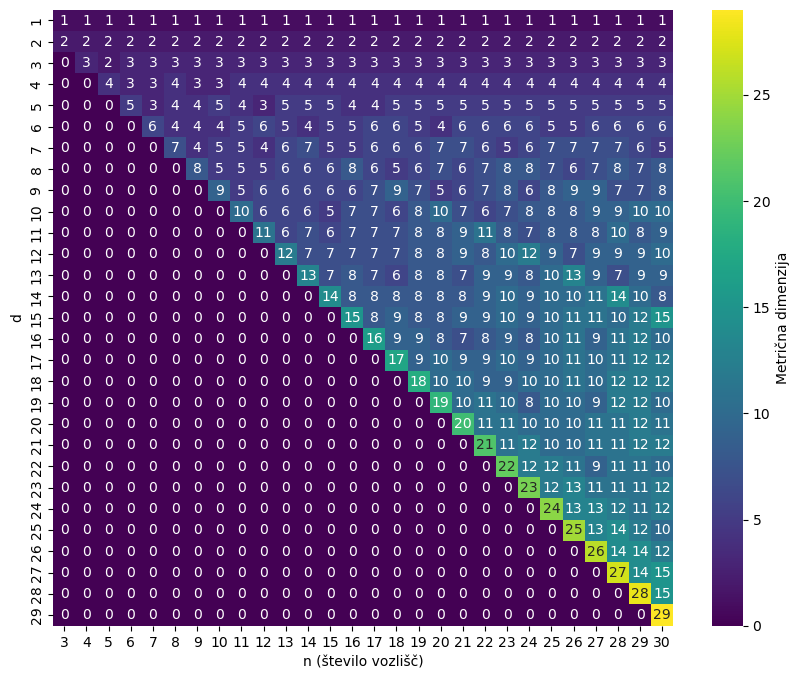

In [53]:
graf_metricnih_dimenzij(30)

TRENUTNE UGOTOVITVE:

- C\(n,1\) = 1 
- C\(n,2\) = 2
- C\(n, n\-1\) = n\-1
- C\(n,n\-2\) = ⌊n/2⌋
- C\(n,n\-3\) = ⌊n/2⌋ za n &gt; 4  
- C\(n, d\) = ⌊n/2⌋, za n/2 &lt;= d &lt; n\-1 in n&lt;12
- C\(2d,d\) = d

